# Lab-7: Biodiversity

This lab dives into a specific research application of data science: Species Distribution Modeling. You will need to interact with with new data and define your own code structure to compare various methods on it. Please reference the overview slides for more detail.

### General Announcements

* The exercises on this sheet are graded by a maximum of **20 points** with an option to gain an additional **2 bonus points to your overall course score**.
* Team work is not allowed! Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 
* If you use any code fragments found on the Internet, make sure you reference them properly.
* You can send your questions via email to Johannes (johannes.dollinger@uzh.ch).
* Any usage of generative coding assistants (e.g. ChatGPT) is forbidden.
* Deadline: 5th of June at midnight

### Instructions

In this lab we do not provide any code skeleton, therefore you will need to write all code from scratch. This simulates the situation you will find yourself in when tackling real applied problems. Feel free to reference previous labs for their code structure.

#### Data (3 pts)

Load the data (*train_po/SWltrain_po.csv*, *test_env/SWltest_env.csv* and *test_pa/SWltest_pa.csv*) and familiarize yourself with them, including analyzing their value & class distribution. See *train_po/01_metadata_SWltrain_po.csv* for an explanation of the predictors. You will need to pre-process the data for your modeling, but do not need to apply filtering.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Lab7_Biodiversity/data/train_po/SWItrain_po.csv')
test_env = pd.read_csv('/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Lab7_Biodiversity/data/test_env/SWItest_env.csv')
test_pa = pd.read_csv('/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Lab7_Biodiversity/data/test_pa/SWItest_pa.csv')

In [19]:
print("Missing values in training data:\n", train.isnull().sum())
print("Missing values in test env:\n", test_env.isnull().sum())
print("Missing values in test pa data:\n", test_pa.isnull().sum())

Missing values in training data:
 siteid    0
spid      0
x         0
y         0
occ       0
group     0
bcc       0
calc      0
ccc       0
ddeg      0
nutri     0
pday      0
precyy    0
sfroyy    0
slope     0
sradyy    0
swb       0
tavecc    0
topo      0
dtype: int64
Missing values in test env:
 group     0
siteid    0
x         0
y         0
bcc       0
calc      0
ccc       0
ddeg      0
nutri     0
pday      0
precyy    0
sfroyy    0
slope     0
sradyy    0
swb       0
tavecc    0
topo      0
dtype: int64
Missing values in test pa data:
 group     0
siteid    0
x         0
y         0
swi01     0
swi02     0
swi03     0
swi04     0
swi05     0
swi06     0
swi07     0
swi08     0
swi09     0
swi10     0
swi11     0
swi12     0
swi13     0
swi14     0
swi15     0
swi16     0
swi17     0
swi18     0
swi19     0
swi20     0
swi21     0
swi22     0
swi23     0
swi24     0
swi25     0
swi26     0
swi27     0
swi28     0
swi29     0
swi30     0
dtype: int64


In [20]:
print("Train shape:", train.shape)
print("Test env shape:", test_env.shape)
print("Test pa shape:", test_pa.shape)

print("\nTrain head:\n", train.head())
print("\nTest env head:\n", test_env.head())
print("\nTest pa head:\n", test_pa.head())

print("\nTrain describe:\n", train.describe())
print("\nTest env describe:\n", test_env.describe())
print("\nTest pa describe:\n", test_pa.describe())

Train shape: (35105, 19)
Test env shape: (10013, 17)
Test pa shape: (10013, 34)

Train head:
    siteid   spid        x       y  occ group  bcc  calc  ccc  ddeg    nutri  \
0      37  swi01  1704250   79350    1  tree   14     0   79  2700   4.2500   
1      71  swi01  1663650   76900    1  tree   98     1    2  2644   7.0000   
2      86  swi01  1656350   78750    1  tree   33     1   54  2452   7.0000   
3      97  swi01  1668000   75150    1  tree   58     1   41  2795   6.5625   
4     118  swi01  1696800  130600    1  tree   92     0    8  2933  17.0000   

   pday  precyy  sfroyy  slope  sradyy  swb  tavecc  topo  
0    41    1254       0    314   18652  -82       0    16  
1    43    1438       0    332   22062    3       0   -31  
2    42    1411       0    337   21609    8      -1  -231  
3    44    1441       0    287   20447   -4       0  -150  
4    40    1422       0    177   17620   45       0   -14  

Test env head:
   group  siteid        x       y  bcc  calc  ccc  ddeg


Class distribution in training data (occ):
 occ
1    35105
Name: count, dtype: int64


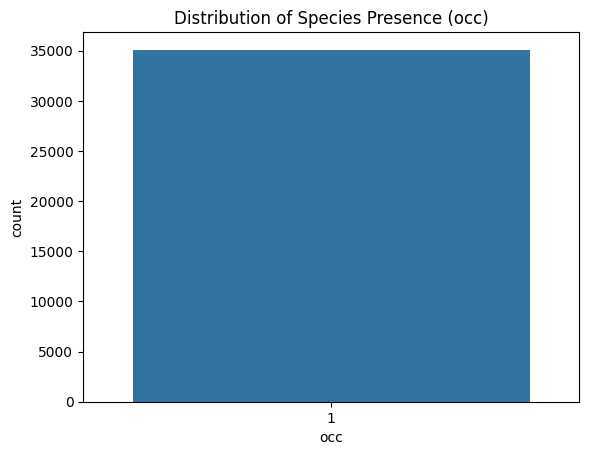


Number of unique species: 30
Species distribution:
 spid
swi06    5822
swi28    5528
swi13    3357
swi10    2830
swi30    2800
swi14    2142
swi08    1452
swi02    1245
swi23     986
swi09     937
swi07     857
swi11     749
swi16     734
swi04     710
swi20     613
swi22     560
swi01     482
swi27     468
swi17     458
swi21     426
swi18     382
swi15     297
swi24     293
swi03     291
swi25     279
swi29     154
swi05      91
swi26      89
swi12      37
swi19      36
Name: count, dtype: int64

Number of unique sites: 11429
Site distribution:
 siteid
13657    20
8787     14
7586     14
7924     13
13612    13
         ..
5226      1
5229      1
4070      1
5244      1
14606     1
Name: count, Length: 11429, dtype: int64


In [21]:
# Class distribution of 'occ'
print("\nClass distribution in training data (occ):\n", train['occ'].value_counts())

# Plot the distribution of 'occ'
sns.countplot(x='occ', data=train)
plt.title('Distribution of Species Presence (occ)')
plt.show()

# Distribution of species (spid)
print("\nNumber of unique species:", train['spid'].nunique())
print("Species distribution:\n", train['spid'].value_counts())

# Distribution of sites (siteid)
print("\nNumber of unique sites:", train['siteid'].nunique())
print("Site distribution:\n", train['siteid'].value_counts())

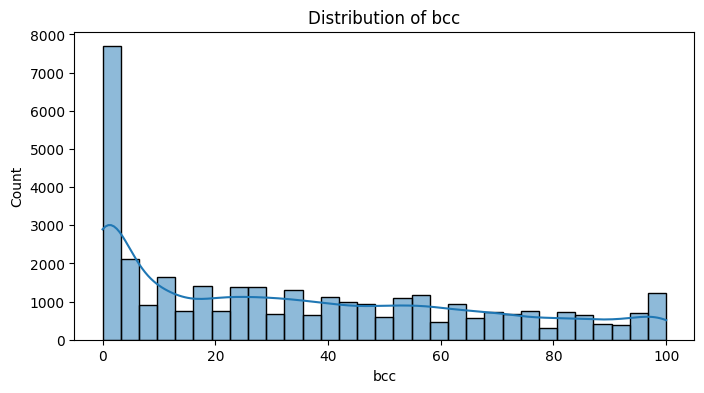

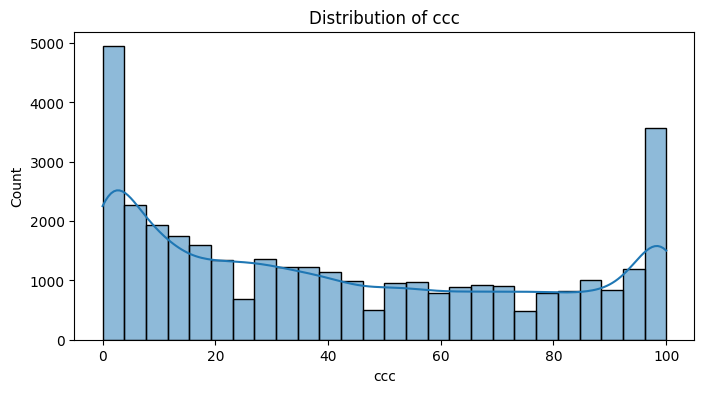

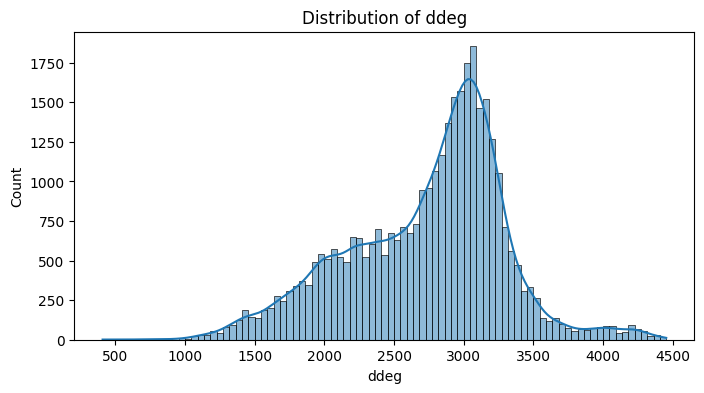

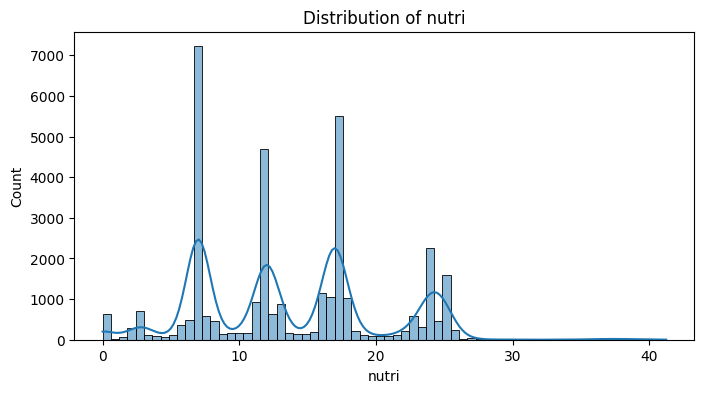

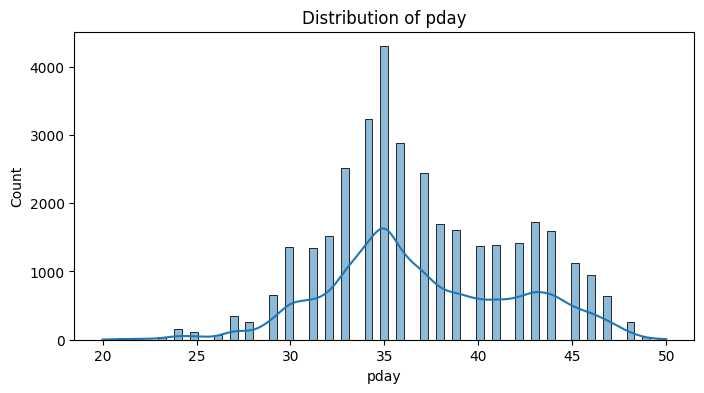

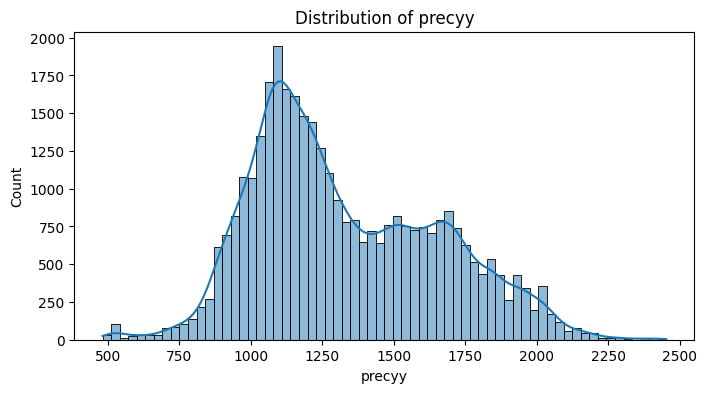

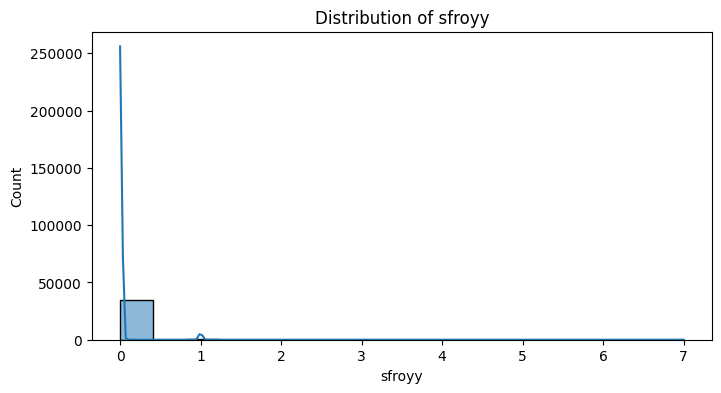

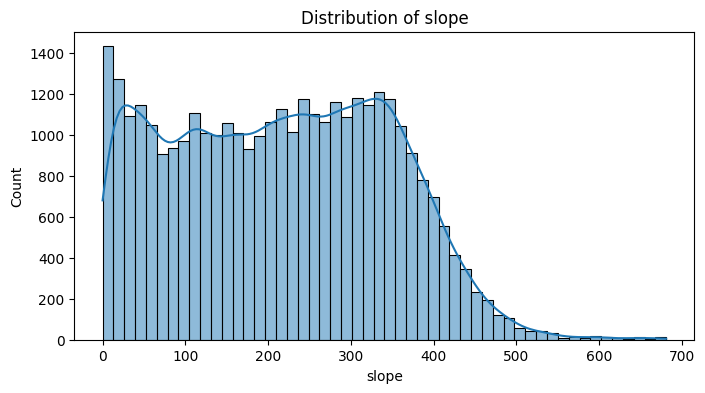

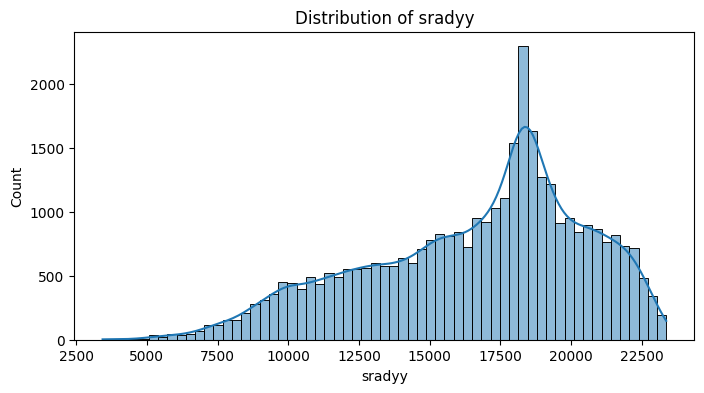

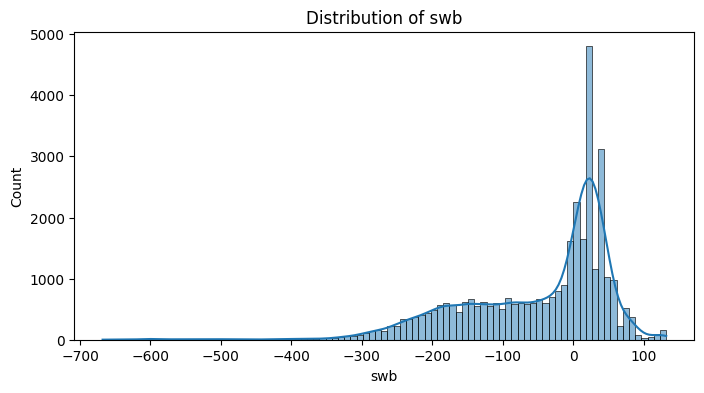

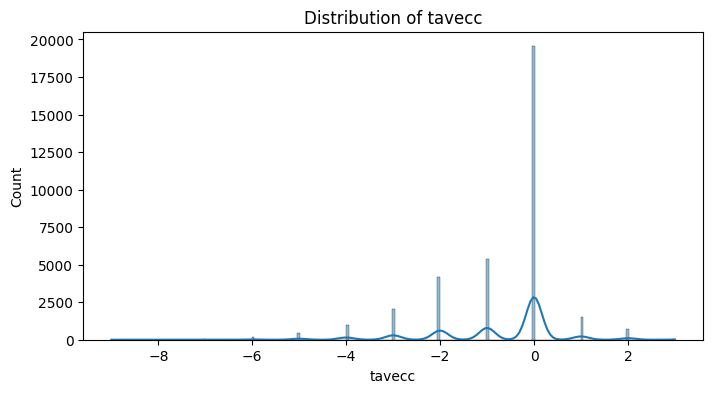

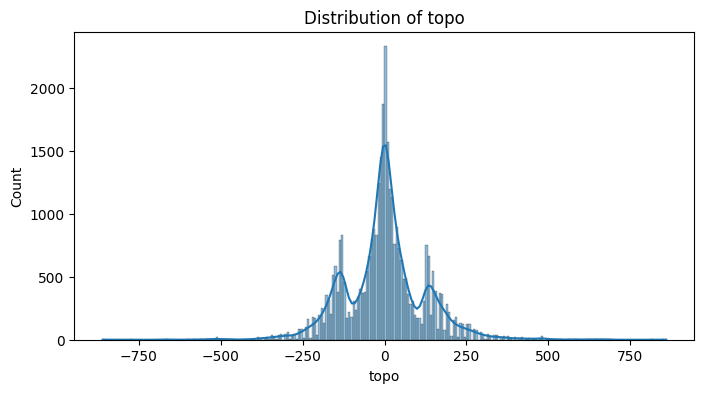

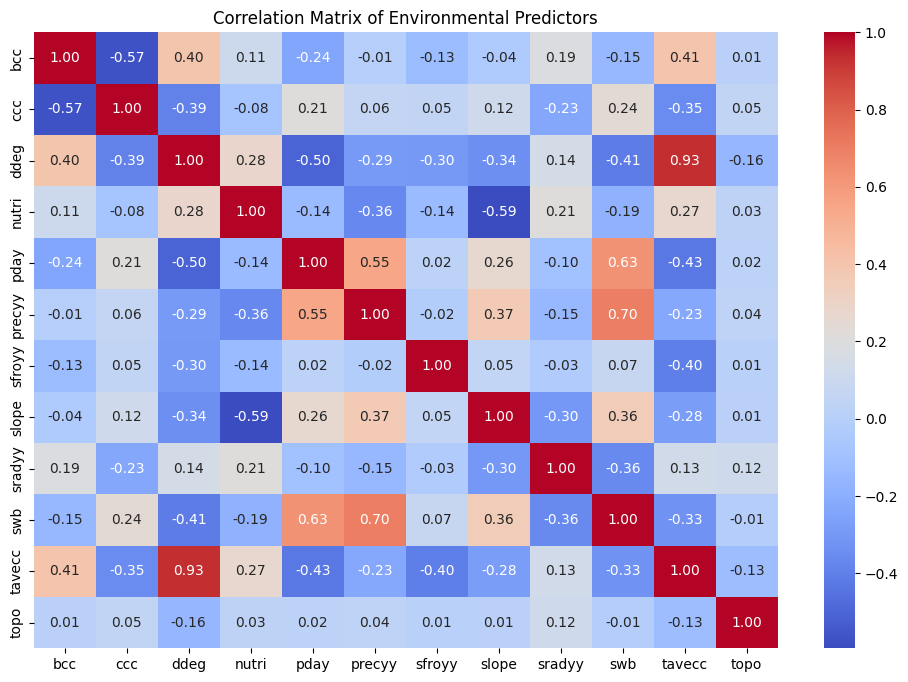

In [22]:
env_predictors = ['bcc', 'ccc', 'ddeg', 'nutri', 'pday', 'precyy', 'sfroyy', 'slope', 'sradyy', 'swb', 'tavecc', 'topo']

# Plot distributions of environmental predictors
for col in env_predictors:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix for environmental predictors
plt.figure(figsize=(12, 8))
sns.heatmap(train[env_predictors].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Environmental Predictors')
plt.show()


#### Classic Modeling (8 pts)

Train two classic models that we have covered previously in the course on the PO-data. You may also take inspiration from the list of methods used in the [original publication](https://nsojournals.onlinelibrary.wiley.com/doi/full/10.1111/j.2006.0906-7590.04596.x)[1]. Produce predictions for the PA-data and receive the accuracy and [F1-score](https://en.wikipedia.org/wiki/F-score) from the Tester-class provided in tester.py. Make sure to try out different hyperparameters in both this and the next section to improve your models performance.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [24]:
# 1. Data Preparation
n_presences = len(train)
background = test_env.sample(n=n_presences, random_state=42, replace=True)
background['occ'] = 0  # Pseudo-absences

train_balanced = pd.concat([train, background]).sample(frac=1, random_state=42)  # Shuffle

# 2. Feature Engineering
selected_features = ['ddeg', 'swb', 'slope', 'tavecc', 'bcc', 'calc', 'sradyy']
X_train = train_balanced[selected_features]
y_train = train_balanced['occ']

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_env[selected_features])

In [25]:
# 4. Modeling
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)

# 5. Predictions
logistic_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]

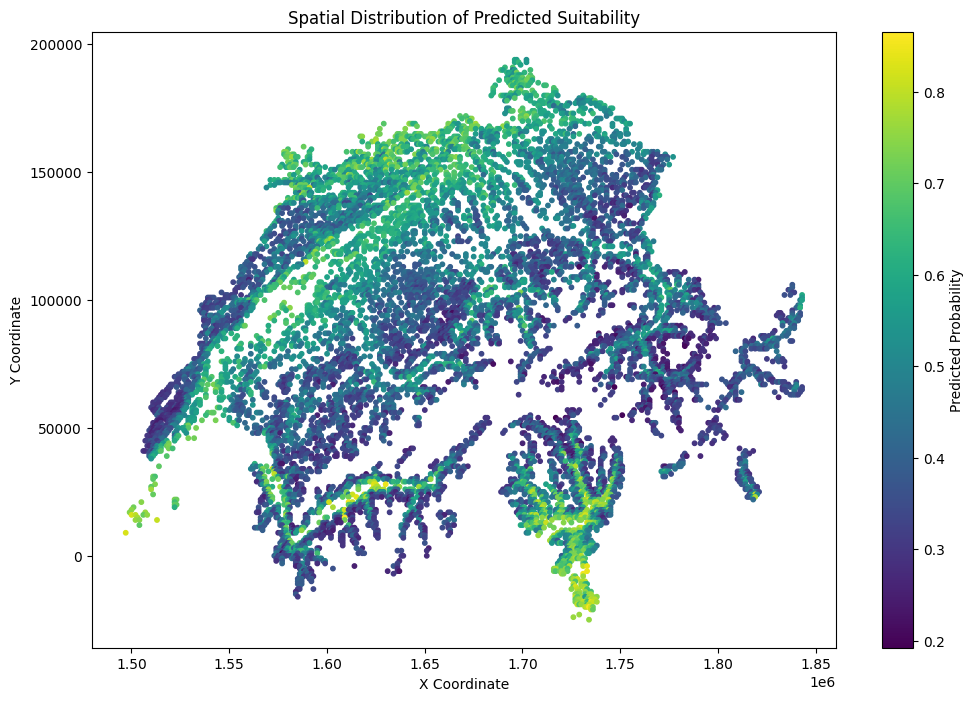

In [27]:
plt.figure(figsize=(12, 8))
sc = plt.scatter(test_env['x'], test_env['y'], c=logistic_probs, cmap='viridis', s=10)
plt.colorbar(sc, label='Predicted Probability')
plt.title('Spatial Distribution of Predicted Suitability')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

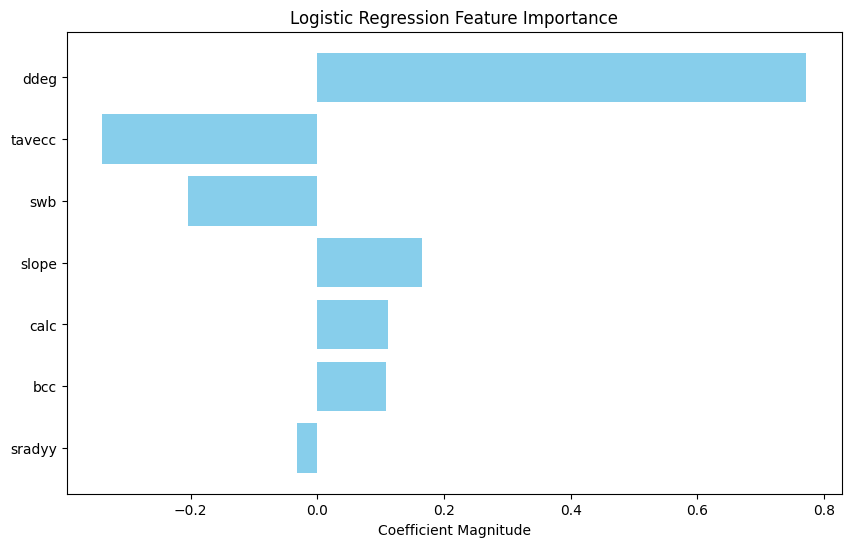

In [28]:
coefs = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logistic_model.coef_[0],
    'Abs_Coef': np.abs(logistic_model.coef_[0])
}).sort_values('Abs_Coef', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefs['Feature'], coefs['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#### Deep Learning Model (4 pts)

Now design and train a small neural network on the data, scoring it again on the PA-data.

#### Spatial Implicit Neural Representations (3 pts)

Test out training a neural network using the [SINR AN-full loss](https://arxiv.org/abs/2306.02564)[2]. You may use the *train_bg* folders files as the samples at random locations. 

#### Discussion (2 pts)

Compare the results from the different models and propose improvements.

#### Bonus: Results Table (2 bonus pts)

Run the experiments for all six regions in the provided data and put the results into a proper (Latex) table as commonly seen in publications.

### Important:
* Make sure to train on the PO-data and to test on the PA-data using the provided test-function.
* If your laptop cannot handle the Swiss datas size, you can switch to a different region.
* It is your own choice which combination of predictors you want to use in modeling, including whether to make the model location-explicit or just climatic.
* Note that "swi01" is referenced as species[0] due to arrays starting with index 0, but the class-counting starting at 1.
* Note that you will need to decide how to turn a probabilistic output (e.g. from a neural network) into a 0/1-binary prediction for calculating the test scores.
* You will not be graded on the absolute performance of your methods, but it should be evident that you properly used & tested them.
* **Please only submit the ML4S_2025_Lab7_Biodiversity.ipynb and any new auxiliary files on OLAT.**

[1] https://nsojournals.onlinelibrary.wiley.com/doi/full/10.1111/j.2006.0906-7590.04596.x

[2] https://arxiv.org/abs/2306.02564

In [ ]:
from tester import Tester
import numpy as np
sf = Tester("./data/test_pa/SWItest_pa.csv")
sf.test(np.ones((10013, 30)))
print("-----")
sf.test(np.zeros((10013, 30)))